# Individual Project 4 (SMP)
**Author:** Sheridan Payne  
**Version:** 1.0  
**Semester:** Spring 2021

This *notebook* contains my solution to **Individual Project 4**

---

In [1]:
import numpy as np
import pandas as pd
import csv
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pywaffle import Waffle

## Importing Original Dataset and Shrinking Dataset to Apply Data Science Techniques

In [2]:
df_full = pd.read_csv('UFC_fighter_data.csv')

In [3]:
df = df_full[[
    'R_fighter','B_fighter','Referee','date','location','Winner','title_bout','weight_class','no_of_rounds',
    'B_avg_opp_BODY_landed','R_avg_opp_BODY_landed','B_avg_opp_HEAD_landed','R_avg_opp_HEAD_landed',
    'B_total_rounds_fought','R_total_rounds_fought','B_Stance','R_Stance',
    'R_Height_cms','B_Height_cms','R_Reach_cms','B_Reach_cms','B_Weight_lbs','R_Weight_lbs','B_age','R_age'
]]

df['date'] = pd.to_datetime(df['date'])
df ## This is the dataset used for the project

<ipython-input-3-75f8c60bcf02>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_avg_opp_BODY_landed,...,B_Stance,R_Stance,R_Height_cms,B_Height_cms,R_Reach_cms,B_Reach_cms,B_Weight_lbs,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,4.000000,...,Orthodox,Orthodox,162.56,167.64,162.56,170.18,135.0,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,9.300000,...,Orthodox,Southpaw,165.10,167.64,167.64,167.64,125.0,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,11.870968,...,Orthodox,Orthodox,180.34,185.42,193.04,185.42,155.0,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,6.000000,...,Switch,Orthodox,162.56,170.18,172.72,170.18,135.0,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,23.500000,...,Southpaw,Southpaw,187.96,180.34,190.50,185.42,250.0,264.0,32.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,3.000000,...,Orthodox,Orthodox,195.58,193.04,NaN,NaN,275.0,216.0,NaN,34.0
5140,Ken Shamrock,Patrick Smith,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,NaN,...,Orthodox,Orthodox,185.42,187.96,182.88,NaN,225.0,205.0,30.0,29.0
5141,Royce Gracie,Art Jimmerson,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,NaN,...,Orthodox,Southpaw,185.42,185.42,NaN,NaN,196.0,175.0,30.0,26.0
5142,Kevin Rosier,Zane Frazier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,NaN,...,Orthodox,Orthodox,193.04,195.58,NaN,NaN,250.0,275.0,NaN,NaN


## Data Types and Missing Data
Creating dataframe to determine:
- the data type of each column
- how much data is missing from each variable

In [4]:
null_count = []
for i in df.columns:
    null_count.append({
        'Column': i, 
        'Data Type': df.dtypes[i], 
        'Missing Data (%)': (df[i].isnull().sum().sum()/df.isnull().sum().sum())*100
    })
null_count = pd.DataFrame(null_count)
null_count.set_index('Column')

,Data Type,Missing Data (%)
Column,,
R_fighter,object,0.000000
B_fighter,object,0.000000
Referee,object,0.427112
date,datetime64[ns],0.000000
location,object,0.000000
Winner,object,0.000000
title_bout,bool,0.000000
weight_class,object,0.000000
no_of_rounds,int64,0.000000


## Summary Statistics for Dataset

In [5]:
ss = df.describe().T
ss

,count,mean,std,min,25%,50%,75%,max
no_of_rounds,5144.0,3.119362,0.631457,1.0,3.000000,3.000000,3.000000,5.00
B_avg_opp_BODY_landed,3879.0,5.639172,4.747421,0.0,2.333333,4.600000,7.714286,48.00
R_avg_opp_BODY_landed,4494.0,5.498694,4.242793,0.0,2.500000,4.800000,7.500000,41.00
B_avg_opp_HEAD_landed,3879.0,17.367830,12.702911,0.0,8.857143,15.000000,23.000000,126.00
R_avg_opp_HEAD_landed,4494.0,16.858422,11.670925,0.0,9.000000,14.833333,22.477647,132.00
B_total_rounds_fought,5144.0,8.920879,11.269340,0.0,1.000000,5.000000,13.000000,75.00
R_total_rounds_fought,5144.0,12.853421,13.369351,0.0,3.000000,9.000000,19.000000,80.00
R_Height_cms,5140.0,179.274089,8.638978,152.4,172.720000,180.340000,185.420000,210.82
B_Height_cms,5136.0,179.238641,8.515039,152.4,172.720000,180.340000,185.420000,210.82
R_Reach_cms,4828.0,183.664412,10.304375,152.4,177.800000,182.880000,190.500000,213.36


In [6]:
ss.to_csv('SummaryStats.csv',index=True,header=True)

## Proportion Tables for Categorical Variables
Proportion tables for each categorical variables in the following order:
- Red fighter (R_fighter)
- Blue fighter (B_fighter)
- Referee
- Date (date)
- Location (location)
- Winner
- Title Fight (title_bout)
- Weight Class (weight_class)
- Number of Rounds of Fight (no_of_rounds)
- Red Fighter Stance (R_Stance)
- Blue Fighter Stance (B_Stance)

In [7]:
R_fighter_prop = pd.DataFrame(
    data=(df['R_fighter'].value_counts().index, 
          df['R_fighter'].value_counts().values, 
          (df['R_fighter'].value_counts().values/df['R_fighter'].value_counts().values.sum())*100)
)
R_fighter_prop = R_fighter_prop.T
R_fighter_prop.columns = ['Red Fighter','Frequency','Proportion (%)']
R_fighter_prop.set_index('Red Fighter')
R_fighter_prop

,Red Fighter,Frequency,Proportion (%)
0,Jim Miller,23,0.447123
1,Donald Cerrone,22,0.427683
2,Demian Maia,21,0.408243
3,Diego Sanchez,21,0.408243
4,Michael Bisping,21,0.408243
...,...,...,...
1329,Nicolae Negumereanu,1,0.01944
1330,Chris Spang,1,0.01944
1331,Elias Garcia,1,0.01944
1332,Suman Mokhtarian,1,0.01944


In [8]:
B_fighter_prop = pd.DataFrame(
    data=(df['B_fighter'].value_counts().index, 
          df['B_fighter'].value_counts().values, 
          (df['B_fighter'].value_counts().values/df['B_fighter'].value_counts().values.sum())*100)
)
B_fighter_prop = B_fighter_prop.T
B_fighter_prop.columns = ['Blue Fighter','Frequency','Proportion (%)']
B_fighter_prop.set_index('Blue Fighter')
B_fighter_prop

,Blue Fighter,Frequency,Proportion (%)
0,Jeremy Stephens,19,0.369362
1,Charles Oliveira,17,0.330482
2,Nik Lentz,14,0.272162
3,Tim Boetsch,13,0.252722
4,Rafael Dos Anjos,13,0.252722
...,...,...,...
1769,Mario Neto,1,0.01944
1770,Tony Petarra,1,0.01944
1771,Amaury Bitetti,1,0.01944
1772,Antonio Banuelos,1,0.01944


In [9]:
ref_prop = pd.DataFrame(
    data=(df['Referee'].value_counts().index, 
          df['Referee'].value_counts().values, 
          (df['Referee'].value_counts().values/df['Referee'].value_counts().values.sum())*100)
)
ref_prop = ref_prop.T
ref_prop.columns = ['Referee','Frequency','Proportion (%)']
ref_prop.set_index('Referee')
ref_prop

,Referee,Frequency,Proportion (%)
0,Herb Dean,726,14.176919
1,John McCarthy,634,12.380394
2,Mario Yamasaki,391,7.635227
3,Dan Miragliotta,347,6.77602
4,Marc Goddard,276,5.389572
...,...,...,...
185,Shawn Gregory,1,0.019527
186,Brandon Pfannenstiel,1,0.019527
187,Ivan Svec,1,0.019527
188,Elvis Bello,1,0.019527


In [10]:
date_group = df.groupby([df['date'].dt.year, df['date'].dt.month]).size()

date_prop = pd.DataFrame(
    data=(date_group.index, 
          date_group.values, 
          (date_group.values/date_group.values.sum())*100)
)
date_prop = date_prop.T
date_prop.columns = ['Date (Year, Month)','Frequency','Proportion (%)']
date_prop.set_index('Date (Year, Month)')

,Frequency,Proportion (%)
"Date (Year, Month)",,
"(1993, 11)",8,0.155521
"(1994, 3)",15,0.291602
"(1994, 9)",6,0.116641
"(1994, 12)",8,0.155521
"(1995, 4)",9,0.174961
...,...,...
"(2019, 2)",49,0.952566
"(2019, 3)",62,1.205288
"(2019, 4)",37,0.719285


In [11]:
loc_prop = pd.DataFrame(
    data=(df['location'].value_counts().index, 
          df['location'].value_counts().values, 
          (df['location'].value_counts().values/df['location'].value_counts().values.sum())*100)
)
loc_prop = loc_prop.T
loc_prop.columns = ['Location','Frequency','Proportion (%)']
loc_prop.set_index('Location')

,Frequency,Proportion (%)
Location,,
"Las Vegas, Nevada, USA",1216,23.639191
"London, England, United Kingdom",114,2.216174
"Montreal, Quebec, Canada",81,1.57465
"Chicago, Illinois, USA",81,1.57465
"Atlantic City, New Jersey, USA",80,1.55521
...,...,...
"Miami, Florida, USA",8,0.155521
"San Juan, Puerto Rico",8,0.155521
"Yokohama, Kanagawa, Japan",7,0.136081


In [12]:
winner_prop = pd.DataFrame(
    data=(df['Winner'].value_counts().index, 
          df['Winner'].value_counts().values, 
          (df['Winner'].value_counts().values/df['Winner'].value_counts().values.sum())*100)
)
winner_prop = winner_prop.T
winner_prop.columns = ['Winner','Frequency','Proportion (%)']
winner_prop.set_index('Winner')

,Frequency,Proportion (%)
Winner,,
Red,3470,67.457232
Blue,1591,30.929238
Draw,83,1.61353


In [13]:
title_prop = pd.DataFrame(
    data=(df['title_bout'].value_counts().index, 
          df['title_bout'].value_counts().values, 
          (df['title_bout'].value_counts().values/df['title_bout'].value_counts().values.sum())*100)
)
title_prop = title_prop.T
title_prop.columns = ['Title Fight','Frequency','Proportion (%)']
title_prop.set_index('Title Fight')

,Frequency,Proportion (%)
Title Fight,,
False,4809,93.487558
True,335,6.512442


In [14]:
wc_prop = pd.DataFrame(
    data=(df['weight_class'].value_counts().index, 
          df['weight_class'].value_counts().values, 
          (df['weight_class'].value_counts().values/df['weight_class'].value_counts().values.sum())*100)
)
wc_prop = wc_prop.T
wc_prop.columns = ['Weight Class','Frequency','Proportion (%)']
wc_prop.set_index('Weight Class')

,Frequency,Proportion (%)
Weight Class,,
Lightweight,989,19.226283
Welterweight,969,18.837481
Middleweight,725,14.09409
Heavyweight,507,9.856143
Light Heavyweight,502,9.758942
Featherweight,442,8.592535
Bantamweight,379,7.367807
Flyweight,187,3.635303
Women's Strawweight,143,2.779938


In [15]:
no_rounds_prop = pd.DataFrame(
    data=(df['no_of_rounds'].value_counts().index, 
          df['no_of_rounds'].value_counts().values, 
          (df['no_of_rounds'].value_counts().values/df['no_of_rounds'].value_counts().values.sum())*100)
)
no_rounds_prop = no_rounds_prop.T
no_rounds_prop.columns = ['Number of Rounds','Frequency','Proportion (%)']
no_rounds_prop.set_index('Number of Rounds').sort_index()

,Frequency,Proportion (%)
Number of Rounds,,
1.0,78.0,1.516330
2.0,98.0,1.905132
3.0,4523.0,87.927683
4.0,22.0,0.427683
5.0,423.0,8.223173


In [16]:
R_stance_prop = pd.DataFrame(
    data=(df['R_Stance'].value_counts().index, 
          df['R_Stance'].value_counts().values, 
          (df['R_Stance'].value_counts().values/df['R_Stance'].value_counts().values.sum())*100)
)
R_stance_prop = R_stance_prop.T
R_stance_prop.columns = ["Red's Stance",'Frequency','Proportion (%)']
R_stance_prop.set_index("Red's Stance")

,Frequency,Proportion (%)
Red's Stance,,
Orthodox,3807,75.988024
Southpaw,1036,20.678643
Switch,150,2.994012
Open Stance,15,0.299401
Sideways,2,0.03992


In [17]:
B_stance_prop = pd.DataFrame(
    data=(df['B_Stance'].value_counts().index, 
          df['B_Stance'].value_counts().values, 
          (df['B_Stance'].value_counts().values/df['B_Stance'].value_counts().values.sum())*100)
)
B_stance_prop = B_stance_prop.T
B_stance_prop.columns = ["Blue's Stance",'Frequency','Proportion (%)']
B_stance_prop.set_index("Blue's Stance")

,Frequency,Proportion (%)
Blue's Stance,,
Orthodox,3829,76.810431
Southpaw,975,19.558676
Switch,168,3.37011
Open Stance,9,0.180542
Sideways,4,0.080241


## Saving Proportional Tables for Future Use

In [18]:
R_fighter_prop.sample(10).to_csv('R_fighter_prop.csv',index=True,header=True)
B_fighter_prop.sample(10).to_csv('B_fighter_prop.csv',index=True,header=True)
ref_prop.sample(10).to_csv('ref_prop.csv',index=True,header=True)
date_prop.sample(10).to_csv('date_prop.csv',index=True,header=True)
loc_prop.sample(10).to_csv('loc_prop.csv',index=True,header=True)
winner_prop.to_csv('winner_prop.csv',index=True,header=True)
title_prop.to_csv('title_prop.csv',index=True,header=True)
wc_prop.to_csv('wc_prop.csv',index=True,header=True)
no_rounds_prop.sort_index().to_csv('no_rounds_prop.csv',index=True,header=True)
R_stance_prop.to_csv('R_stance_prop.csv',index=True,header=True)
B_stance_prop.to_csv('B_stance_prop.csv',index=True,header=True)

## Correlation Table and Heatmap
Creating:
- correlation table of continuous variables
- correlation heatmap of correlation table
- save heatmap as .png file

In [19]:
df.corr()

,title_bout,no_of_rounds,B_avg_opp_BODY_landed,R_avg_opp_BODY_landed,B_avg_opp_HEAD_landed,R_avg_opp_HEAD_landed,B_total_rounds_fought,R_total_rounds_fought,R_Height_cms,B_Height_cms,R_Reach_cms,B_Reach_cms,B_Weight_lbs,R_Weight_lbs,B_age,R_age
title_bout,1.000000,0.565275,-0.070144,-0.032187,-0.089514,-0.112959,0.109318,0.075268,0.005697,0.001943,0.028434,0.001282,0.052360,0.043677,0.026505,0.000712
no_of_rounds,0.565275,1.000000,0.029174,0.057937,0.011205,0.017226,0.298610,0.294163,-0.017693,-0.022419,0.064704,0.054970,-0.067090,-0.038567,0.128816,0.108800
B_avg_opp_BODY_landed,-0.070144,0.029174,1.000000,0.169611,0.576895,0.157330,0.052165,0.051710,-0.195792,-0.235630,-0.174731,-0.246767,-0.222144,-0.218301,0.008092,0.029611
R_avg_opp_BODY_landed,-0.032187,0.057937,0.169611,1.000000,0.166580,0.591722,0.039011,0.107778,-0.296276,-0.235915,-0.300053,-0.220166,-0.268421,-0.267457,-0.026954,0.024521
B_avg_opp_HEAD_landed,-0.089514,0.011205,0.576895,0.166580,1.000000,0.183431,0.064146,0.018986,-0.187841,-0.205264,-0.181517,-0.222234,-0.217553,-0.212527,0.023610,0.030355
R_avg_opp_HEAD_landed,-0.112959,0.017226,0.157330,0.591722,0.183431,1.000000,0.046860,0.122252,-0.224780,-0.197364,-0.247415,-0.184616,-0.242330,-0.247327,-0.010259,0.063331
B_total_rounds_fought,0.109318,0.298610,0.052165,0.039011,0.064146,0.046860,1.000000,0.444173,0.027543,0.028081,0.061257,0.067367,0.005147,0.013892,0.367756,0.228915
R_total_rounds_fought,0.075268,0.294163,0.051710,0.107778,0.018986,0.122252,0.444173,1.000000,-0.028943,0.011939,0.020603,0.061949,-0.032266,-0.028756,0.193969,0.441161
R_Height_cms,0.005697,-0.017693,-0.195792,-0.296276,-0.187841,-0.224780,0.027543,-0.028943,1.000000,0.703412,0.890929,0.690578,0.719981,0.781129,0.160036,0.075815
B_Height_cms,0.001943,-0.022419,-0.235630,-0.235915,-0.205264,-0.197364,0.028081,0.011939,0.703412,1.000000,0.683731,0.886634,0.751866,0.737309,0.095672,0.156141


In [20]:
df.corr().to_csv('correlation.csv',index=True,header=True)

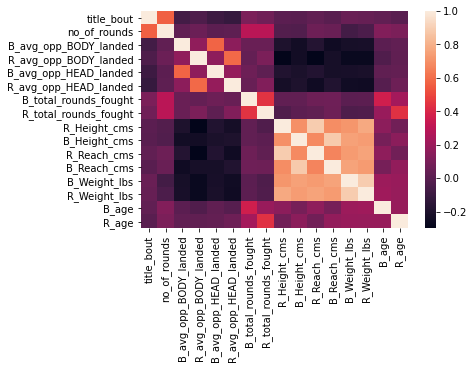

In [21]:
fig1 = plt.figure()
sns.heatmap(df.corr())
fig1.savefig('corr_matrix.png')

## Data Set Graphical Exploration
Creating one of more plots of UFC fights dataset for each type of plot:
- Distributions
- Scatter Plots / Pairwise Plots
- Bar Charts
- Other Plots

### Distributions

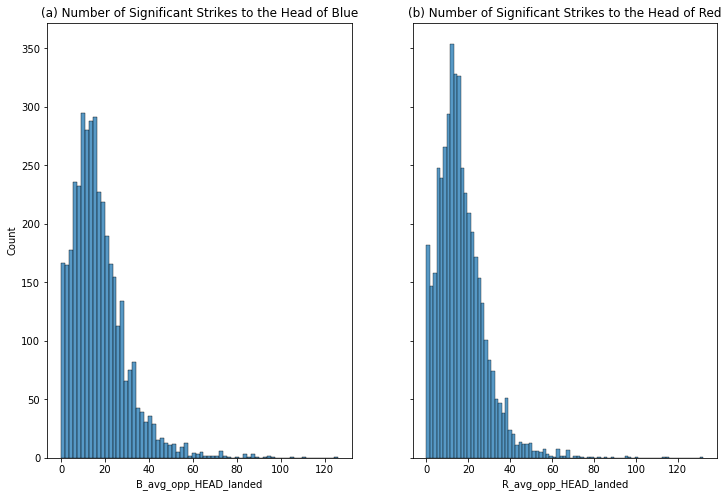

In [36]:
fig2, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(12,8))
sns.histplot(df['B_avg_opp_HEAD_landed'], ax=ax1)
sns.histplot(df['R_avg_opp_HEAD_landed'], ax=ax2)
ax1.title.set_text('(a) Number of Significant Strikes to the Head of Blue')
ax2.title.set_text('(b) Number of Significant Strikes to the Head of Red')
plt.show()

fig2.savefig('Head_strikes.png')

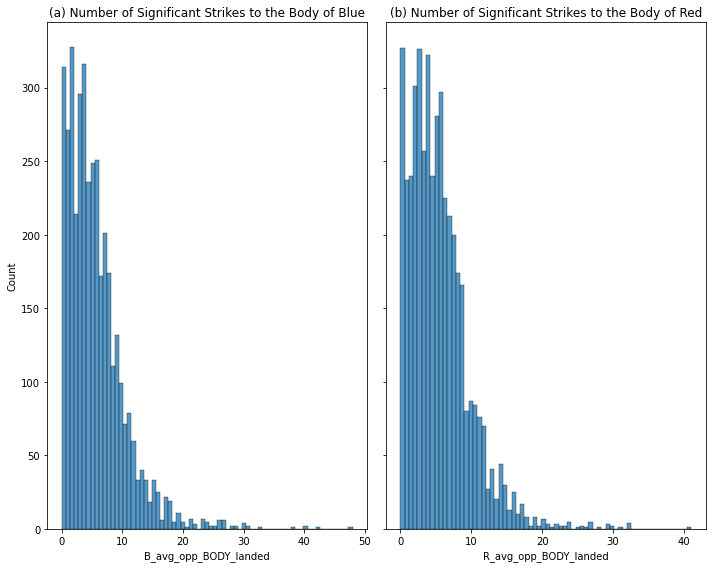

In [35]:
fig3, (ax3, ax4) = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(10,8))
sns.histplot(df['B_avg_opp_BODY_landed'], ax=ax3)
sns.histplot(df['R_avg_opp_BODY_landed'], ax=ax4)
ax3.title.set_text('(a) Number of Significant Strikes to the Body of Blue')
ax4.title.set_text('(b) Number of Significant Strikes to the Body of Red')
fig3.tight_layout()
plt.show()

fig3.savefig('Body_strikes.png')

C:\Users\sheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sheri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


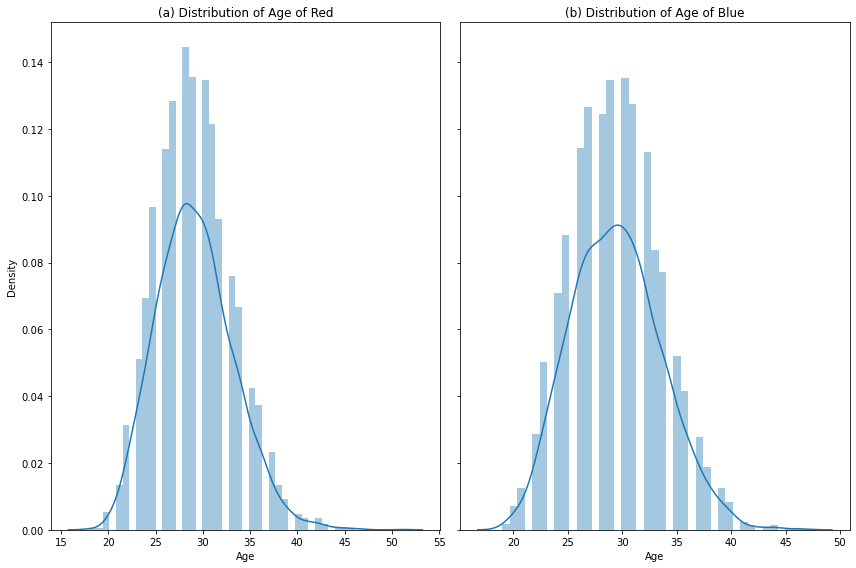

In [37]:
fig4, (ax5, ax6) = plt.subplots(nrows=1,ncols=2,sharey=True,figsize=(12,8))
sns.distplot(df['B_age'], ax=ax5)
sns.distplot(df['R_age'], ax=ax6)

ax5.set_title('(a) Distribution of Age of Red')
ax5.set_xlabel('Age')
ax6.set_title('(b) Distribution of Age of Blue')
ax6.set_xlabel('Age')
fig4.tight_layout()

plt.show()

fig4.savefig('Age.png')

### Scatter Plots / Pairwise Plots

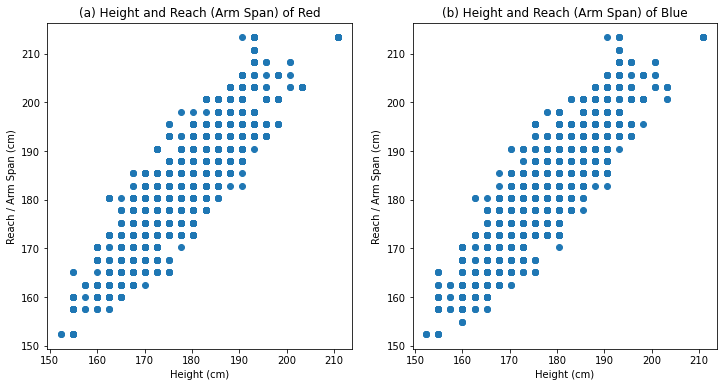

In [38]:
fig5 = plt.figure(figsize=(12,6))
ax7 = fig5.add_subplot(121)
ax7.scatter(df['R_Height_cms'],df['R_Reach_cms'])
ax8 = fig5.add_subplot(122)
ax8.scatter(df['B_Height_cms'],df['B_Reach_cms'])

ax7.set_title('(a) Height and Reach (Arm Span) of Red')
ax7.set_xlabel('Height (cm)')
ax7.set_ylabel('Reach / Arm Span (cm)')

ax8.set_title('(b) Height and Reach (Arm Span) of Blue')
ax8.set_xlabel('Height (cm)')
ax8.set_ylabel('Reach / Arm Span (cm)')

fig5.savefig('Height_reach.png')

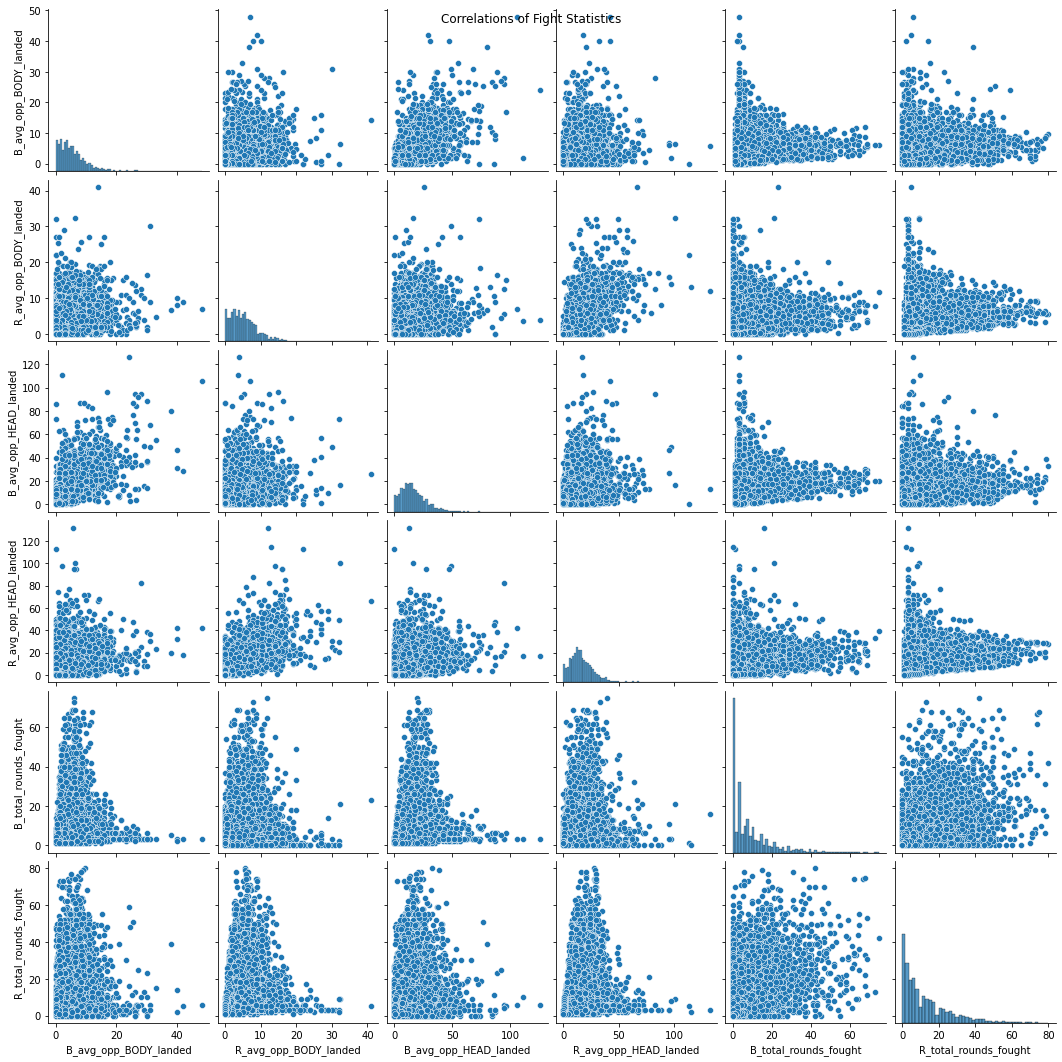

In [27]:
df_cont1 = df[[
        'B_avg_opp_BODY_landed','R_avg_opp_BODY_landed','B_avg_opp_HEAD_landed','R_avg_opp_HEAD_landed',
        'B_total_rounds_fought','R_total_rounds_fought'
    ]]

fig6 = sns.pairplot(df_cont1)
fig6.fig.suptitle('Correlations of Fight Statistics')
fig6.savefig('Corr_fight.png')

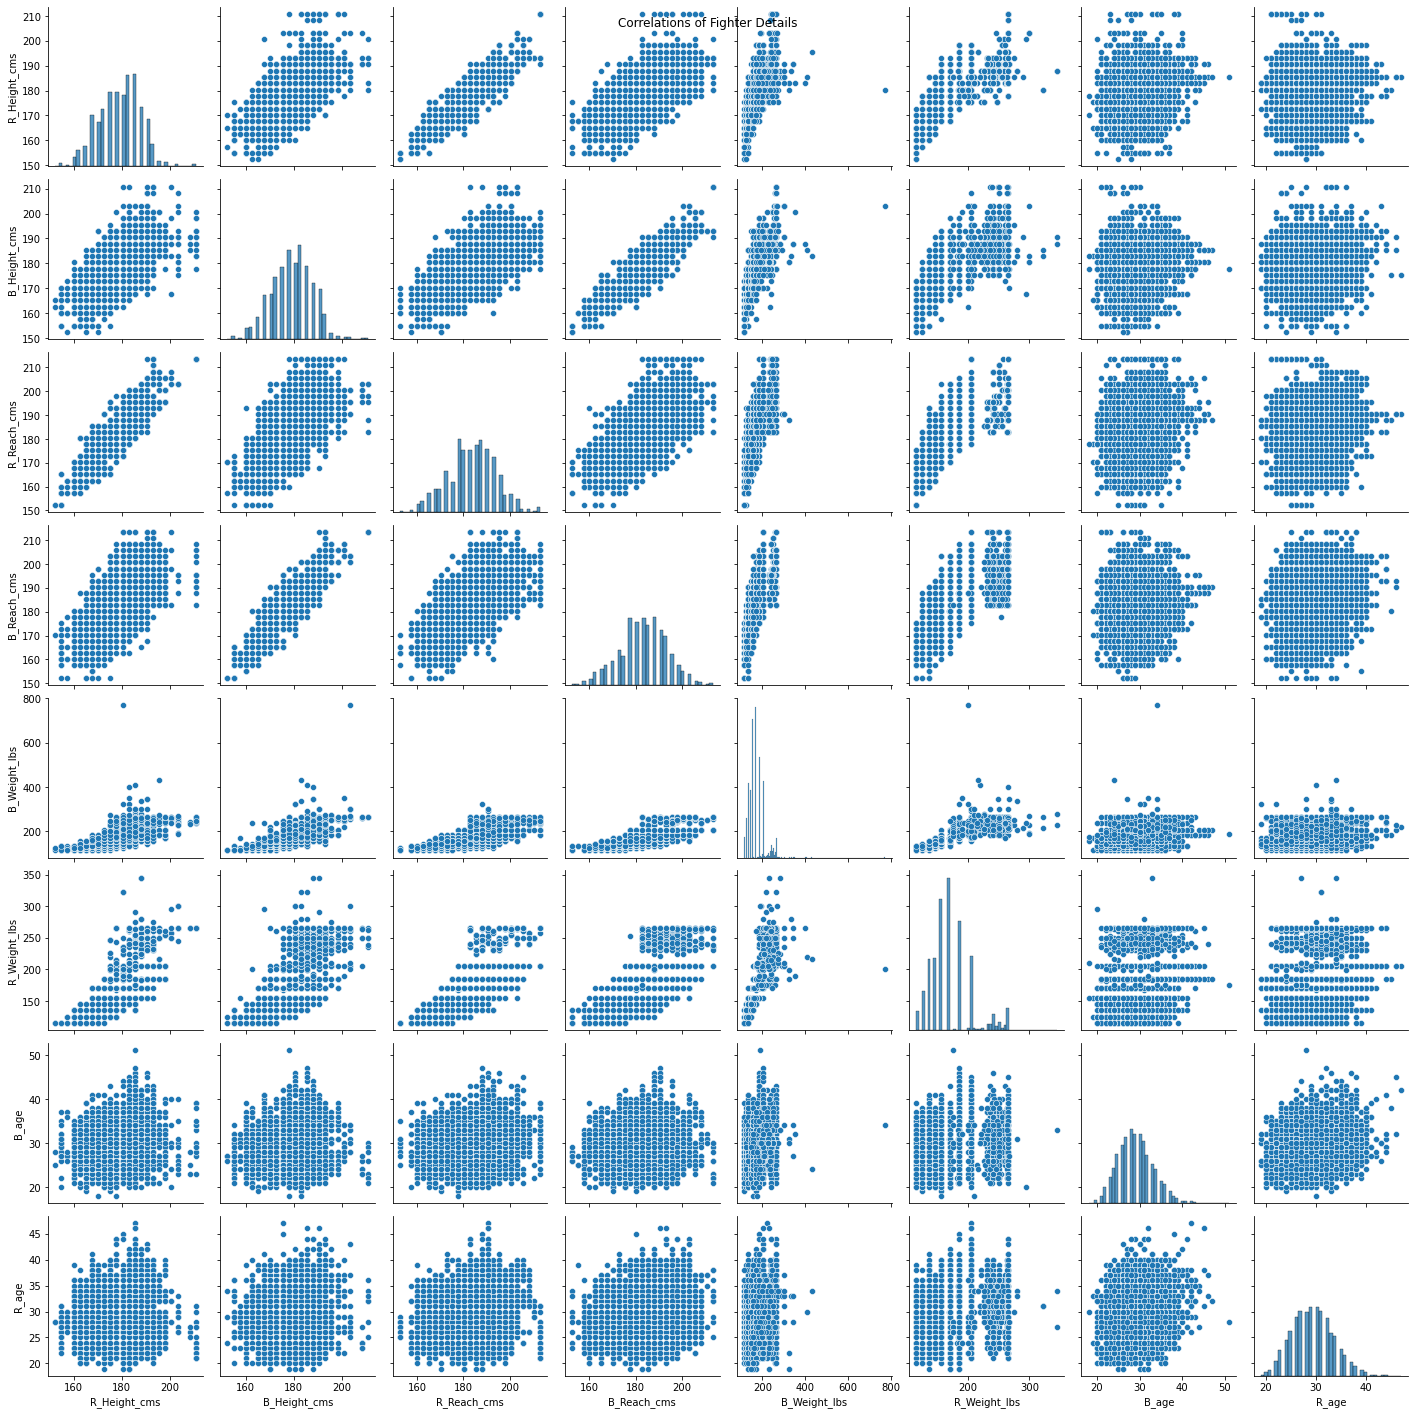

In [28]:
df_cont2 = df[[
        'R_Height_cms','B_Height_cms','R_Reach_cms','B_Reach_cms',
        'B_Weight_lbs','R_Weight_lbs','B_age','R_age'
    ]]
fig7 = sns.pairplot(df_cont2)
fig7.fig.suptitle('Correlations of Fighter Details')
fig7.savefig('Corr_fighter.png')

### Bar Charts

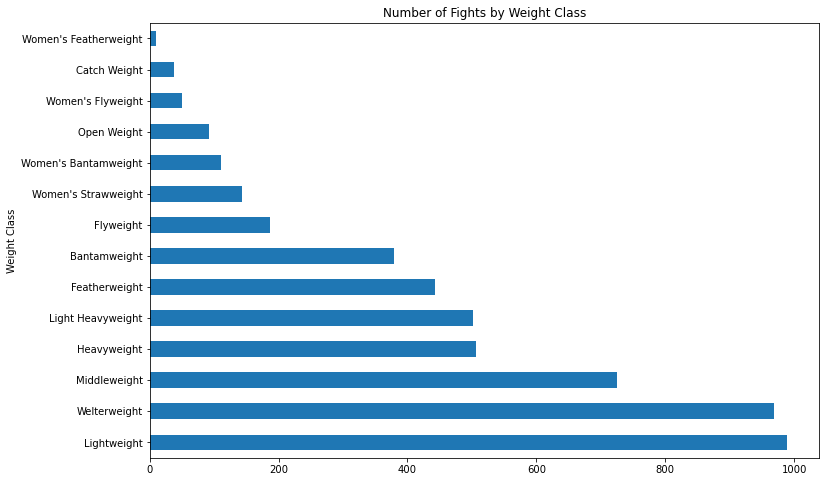

In [29]:
fig8 = plt.figure(figsize=(12,8))
df['weight_class'].value_counts().plot(kind='barh',title='Number of Fights by Weight Class',xlabel='Weight Class')
fig8.savefig('Weight_bar.png')

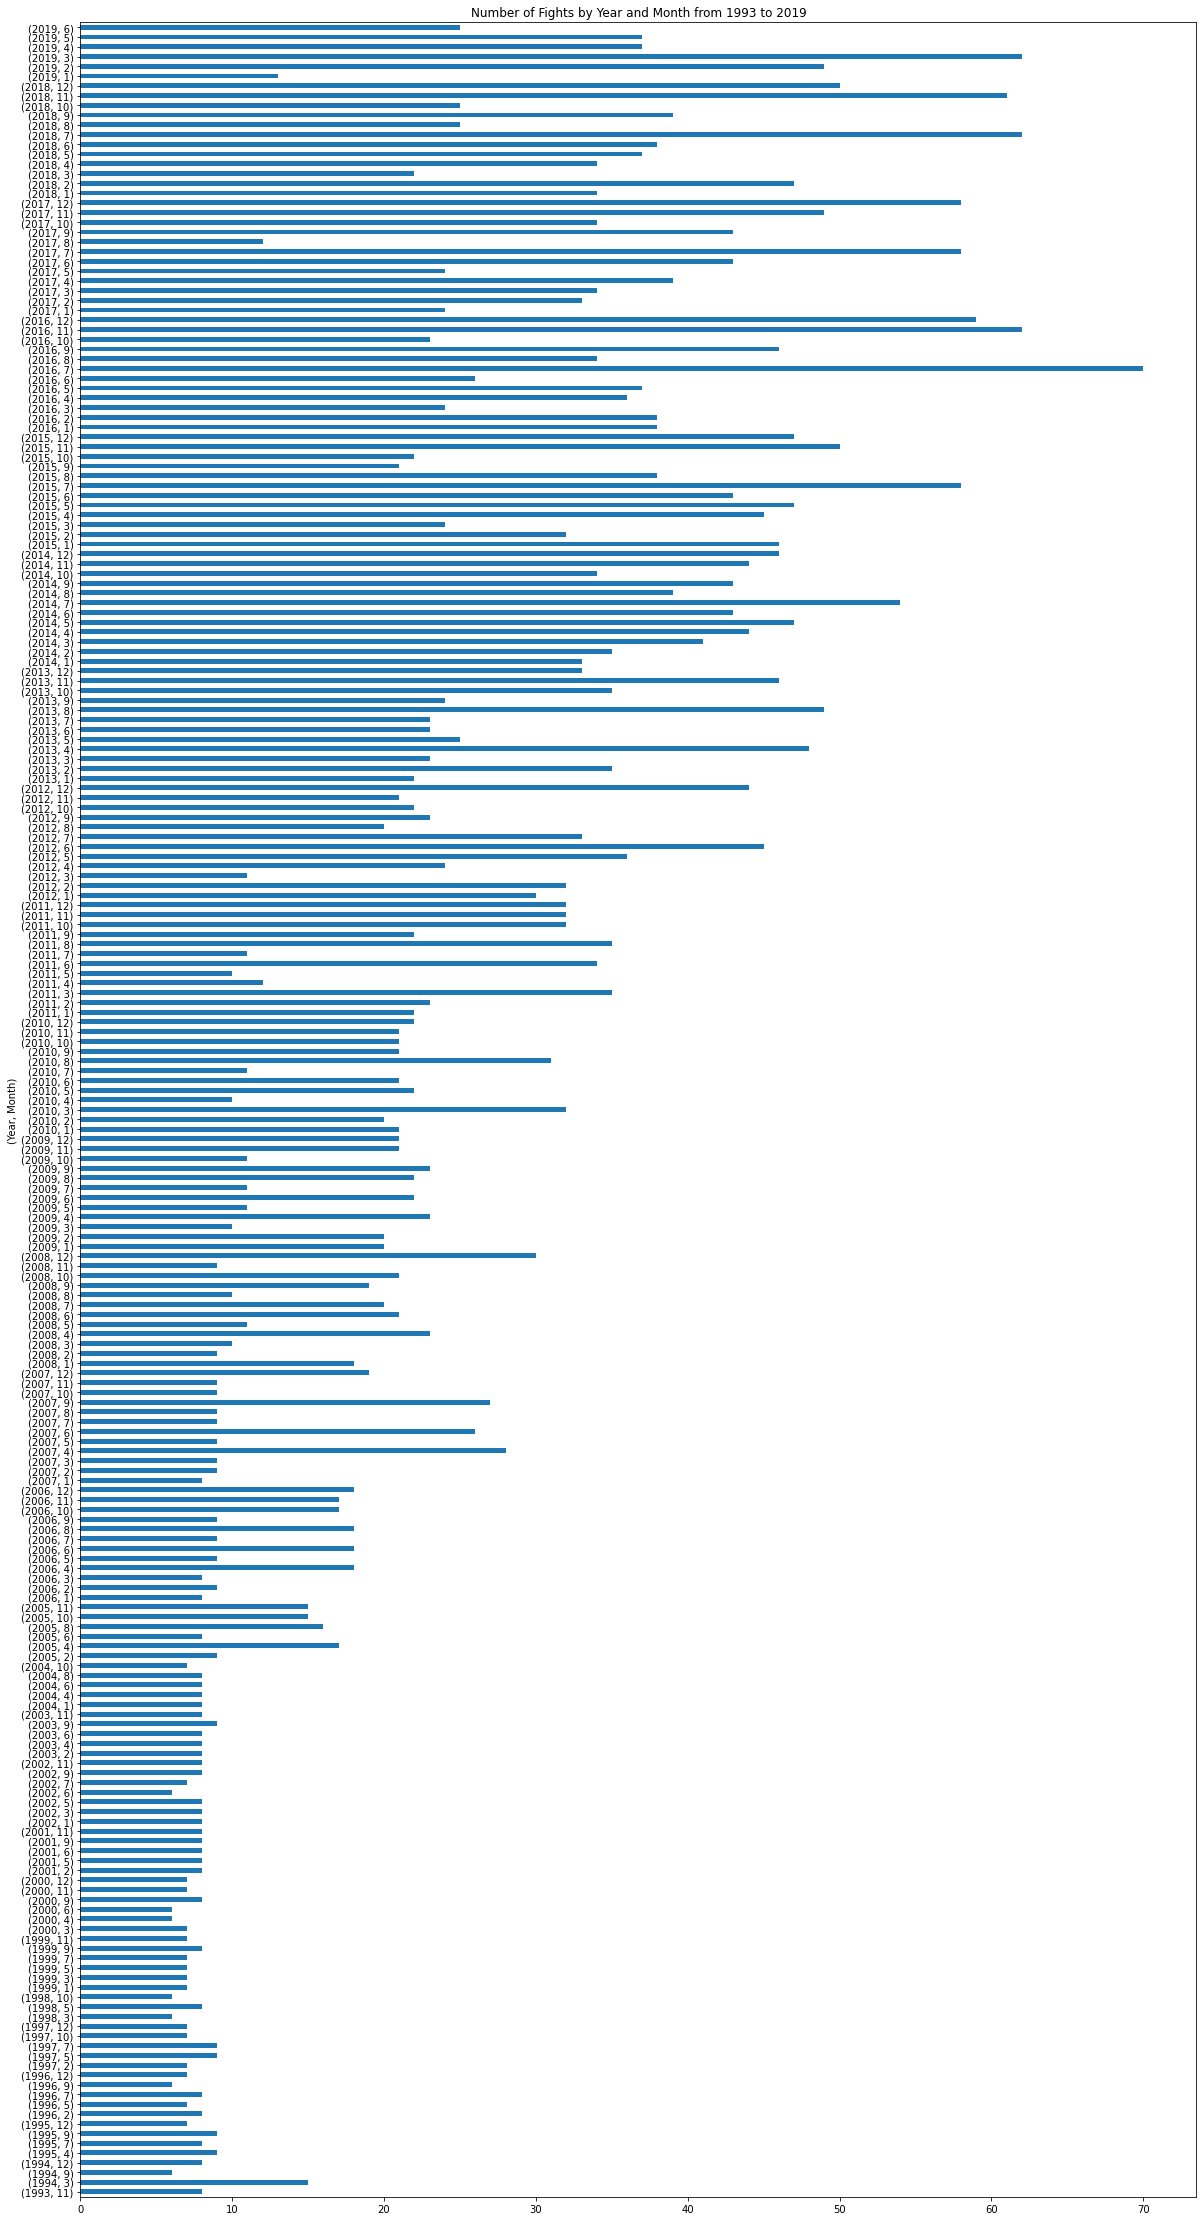

In [30]:
fig9 = plt.figure(figsize=(20, 40))
df.groupby([df['date'].dt.year,df['date'].dt.month]).size().plot(kind='barh',title='Number of Fights by Year and Month from 1993 to 2019',xlabel='(Year, Month)')
plt.show()
fig9.savefig('Fights_YM.png')

### Line Graphs

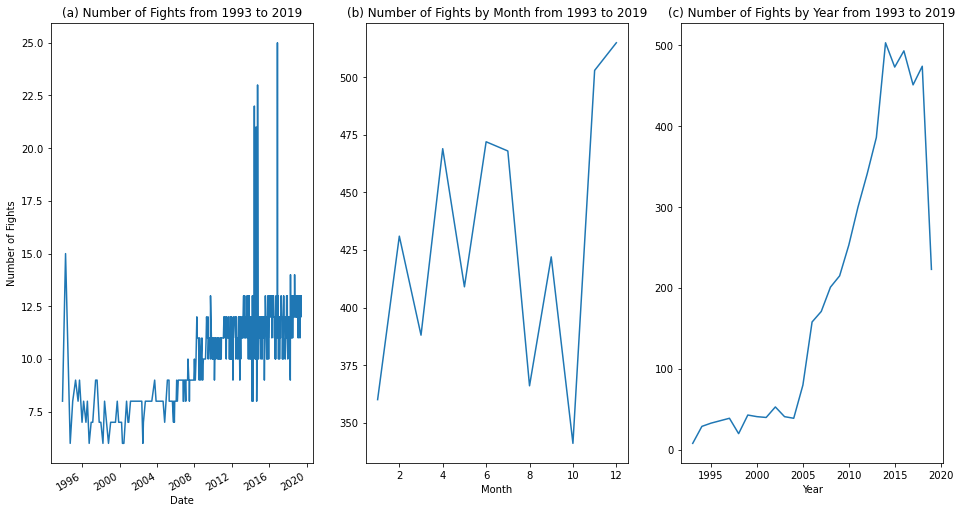

In [39]:
fig10, (ax9, ax10, ax11) = plt.subplots(nrows=1,ncols=3,figsize=(16,9))
df['date'].value_counts().plot(title='(a) Number of Fights from 1993 to 2019',xlabel='Date',ylabel='Number of Fights',ax=ax9)
df.groupby([df['date'].dt.month]).size().plot(title='(b) Number of Fights by Month from 1993 to 2019',xlabel='Month',ax=ax10)
df.groupby([df['date'].dt.year]).size().plot(title='(c) Number of Fights by Year from 1993 to 2019',xlabel='Year',ax=ax11)
fig10.savefig('Fights_line.png')

### Waffle Plot

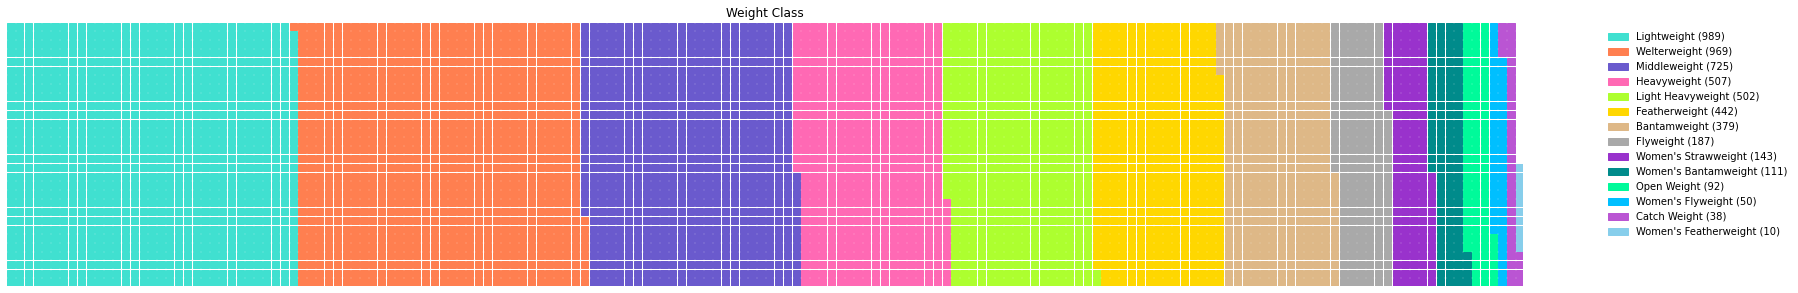

In [32]:
wc = df['weight_class'].value_counts()
fig11 = plt.figure(
    FigureClass=Waffle, 
    rows=30, 
    values=wc, 
    colors=('turquoise', 'coral', 'slateblue','hotpink','greenyellow','gold','burlywood','darkgrey','darkorchid','darkcyan','mediumspringgreen','deepskyblue','mediumorchid','skyblue'),
    title={'label': 'Weight Class', 'loc': 'center'},
    labels=["{0} ({1})".format(k, v) for k, v in wc.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'framealpha': 0},
    figsize=(25,16)
)
plt.show()
fig11.savefig('Weight_waffle.png')